In [1]:
import pandas as pd
import numpy as np
dataDir = 'C:/Users/15043/'
print(dataDir)
################################################################################
prt1 = 'Table_summary_HF_KS_Lancet.csv'
output_path1 = dataDir + prt1

df = pd.read_csv(output_path1, header = 0);
display(df)

C:/Users/15043/


,chr,start,end,q-val,ind,MarkerName
0,1,106803482,106803482,1.0,1,unspec
1,1,106803523,106803523,1.0,2,unspec
2,1,106804091,106804091,1.0,3,unspec
3,1,106804698,106804698,1.0,4,unspec
4,1,106805935,106805935,1.0,5,unspec
...,...,...,...,...,...,...
11657,22,39973838,39973838,1.0,11658,unspec
11658,22,39974147,39974147,1.0,11659,unspec
11659,22,39975500,39975500,1.0,11660,unspec
11660,22,39975635,39975635,1.0,11661,unspec


In [4]:
import math
df['-log_10(q)'] = -np.log10(df['q-val'])
df.shape

(11662, 7)

In [5]:
running_pos = 0
cumulative_pos = []
for chrom, group_df in df.groupby('chr'):  
    cumulative_pos.append(group_df['start'] + running_pos)
    running_pos += group_df['start'].max()
    
df['cumulative_pos'] = pd.concat(cumulative_pos)

df

,chr,start,end,q-val,ind,MarkerName,-log_10(q),cumulative_pos
0,1,106803482,106803482,1.0,1,unspec,-0.0,106803482
1,1,106803523,106803523,1.0,2,unspec,-0.0,106803523
2,1,106804091,106804091,1.0,3,unspec,-0.0,106804091
3,1,106804698,106804698,1.0,4,unspec,-0.0,106804698
4,1,106805935,106805935,1.0,5,unspec,-0.0,106805935
...,...,...,...,...,...,...,...,...
11657,22,39973838,39973838,1.0,11658,unspec,-0.0,2196486115
11658,22,39974147,39974147,1.0,11659,unspec,-0.0,2196486424
11659,22,39975500,39975500,1.0,11660,unspec,-0.0,2196487777
11660,22,39975635,39975635,1.0,11661,unspec,-0.0,2196487912


In [6]:
df['SNP number'] = df.index
df

,chr,start,end,q-val,ind,MarkerName,-log_10(q),cumulative_pos,SNP number
0,1,106803482,106803482,1.0,1,unspec,-0.0,106803482,0
1,1,106803523,106803523,1.0,2,unspec,-0.0,106803523,1
2,1,106804091,106804091,1.0,3,unspec,-0.0,106804091,2
3,1,106804698,106804698,1.0,4,unspec,-0.0,106804698,3
4,1,106805935,106805935,1.0,5,unspec,-0.0,106805935,4
...,...,...,...,...,...,...,...,...,...
11657,22,39973838,39973838,1.0,11658,unspec,-0.0,2196486115,11657
11658,22,39974147,39974147,1.0,11659,unspec,-0.0,2196486424,11658
11659,22,39975500,39975500,1.0,11660,unspec,-0.0,2196487777,11659
11660,22,39975635,39975635,1.0,11661,unspec,-0.0,2196487912,11660


224

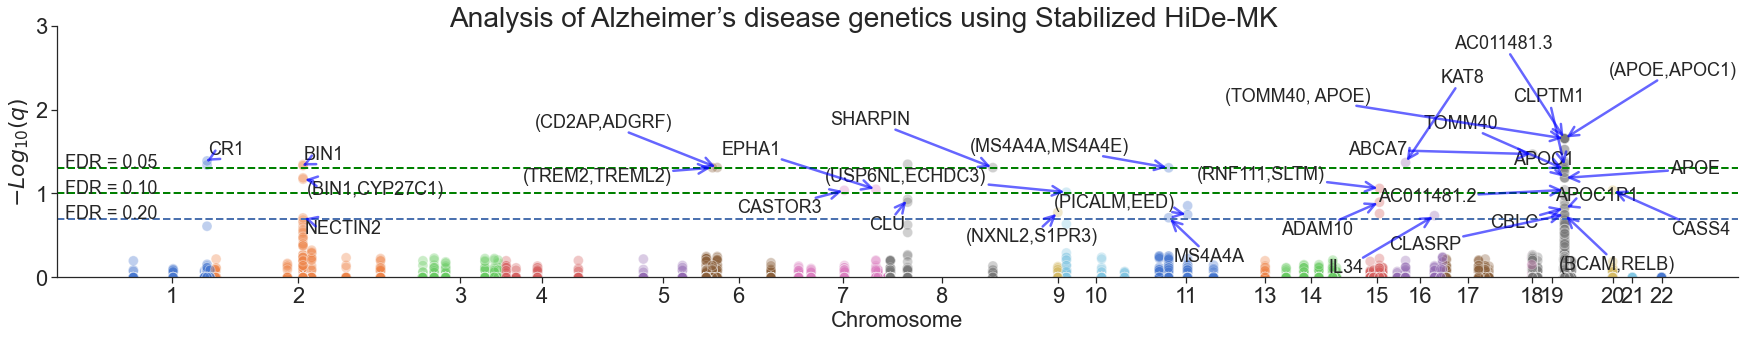

In [9]:
import seaborn as sns
%matplotlib inline
#sns.set(font_scale=.8)
import adjustText
from adjustText import adjust_text
sns.set(font_scale=2,style="ticks")
#sns.set(style="whitegrid")
g = sns.relplot(    
    data = df.sample(11662),
    x = 'cumulative_pos',
    y = '-log_10(q)',
    aspect = 5,
    hue = 'chr',
    palette = 'muted',  
    alpha=0.35,
    s=100,
    legend=None
)
g.ax.set_ylim([0,3])
g.ax.set_xlabel('Chromosome', size = 22)
g.ax.set_ylabel( "$-Log_{10}(q)$" , size = 22),
g.ax.font_scale=12
g.ax.set_xticks((df.groupby('chr')['cumulative_pos'].max()+df.groupby('chr')['cumulative_pos'].min())/2)
g.ax.set_xticklabels(df['chr'].unique())
g.ax.axhline(-np.log10(0.05), linestyle='--', color='green', linewidth=2)
g.ax.text(14000000,-np.log10(0.05), "FDR = 0.05", size =18)

g.ax.axhline(-np.log10(0.1), linestyle='--', color='green', linewidth=2)
g.ax.text(14000000,-np.log10(0.1), "FDR = 0.10", size =18)
g.ax.axhline(-np.log10(0.2), linestyle='--', linewidth=2)
g.ax.text(14000000,-np.log10(0.2), "FDR = 0.20", size =18)
g.fig.suptitle('Analysis of Alzheimer’s disease genetics using Stabilized HiDe-MK',size=28)
Temp1 = df[df['q-val'] < 0.2]
Unique_marker = Temp1['MarkerName'].drop_duplicates()
Final = df.iloc[list(Unique_marker.index)]
annotations = Final.apply(lambda p : g.ax.annotate(p['MarkerName'], (p['cumulative_pos'], p['-log_10(q)']),size=18), axis=1).to_list()
adjust_text(annotations, arrowprops = {'arrowstyle' : '->', 'color' : 'blue', 
                                       "alpha": 0.6, "linewidth":2.5},expand_text=(1.5, 1.5), ha='center', va='top')